# **EDA on Spotify Hits**

#### Exploratory Data Analysis (EDA) on Spotify Tracks
Here i want to explore the data of Spotify Tracks to find out **What Makes a Song Popolar** based on some features here consider some insights.
 * Are happy songs more popular?
 * Do popular songs tend to be shorter?
 * What about loudness or genre?


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [23]:
file_path = 'spotify.csv'
df = pd.read_csv(file_path)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [25]:
df.shape

(114000, 20)

### Column Conversion

In [26]:
# Step 2: Drop rows with missing values
df = df.dropna()

# Convert duration from milliseconds to seconds and add new column
df['duration_sec'] = df['duration_ms'] / 1000

# Check shape and confirm
print("Dataset size after cleaning:", df.shape)

Dataset size after cleaning: (113999, 21)


### Handling outliers

In [27]:
def remove_high_outlier_columns(df, threshold=0.10):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    cols_to_drop = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count number of outliers
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_ratio = len(outliers) / len(df)

        # Mark column for removal if ratio exceeds threshold
        if outlier_ratio > threshold:
            cols_to_drop.append(col)
            print(f"Dropping '{col}' — {outlier_ratio:.2%} outliers")

    # Drop the columns
    df_cleaned = df.drop(columns=cols_to_drop)
    return df_cleaned, cols_to_drop


In [28]:
df_cleaned, dropped_cols = remove_high_outlier_columns(df, threshold=0.10)
print("Removed columns:", dropped_cols)

Dropping 'speechiness' — 11.59% outliers
Dropping 'instrumentalness' — 22.15% outliers
Dropping 'time_signature' — 10.66% outliers
Removed columns: ['speechiness', 'instrumentalness', 'time_signature']


In [29]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,198.853


### Popular Songs based on Popularity Score

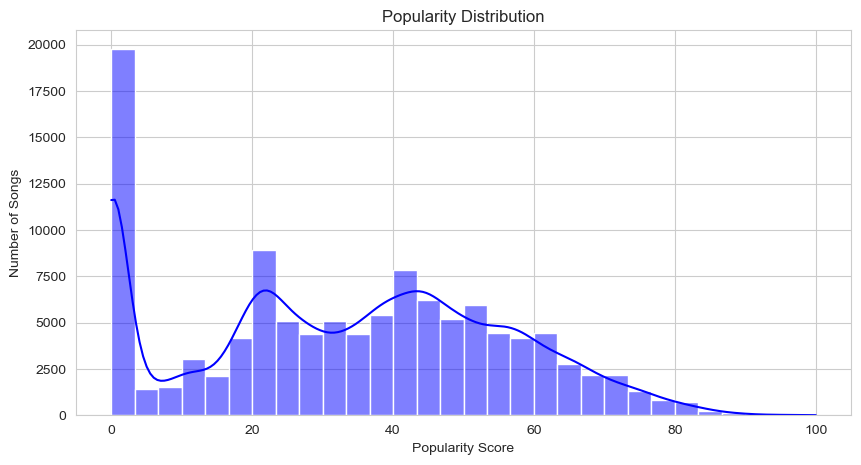

Top 5 Most Popular Songs:
                                  track_name                  artists  \
20001              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
81051              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
51664  Quevedo: Bzrp Music Sessions, Vol. 52         Bizarrap;Quevedo   
89411                             La Bachata            Manuel Turizo   
81210                        I'm Good (Blue)  David Guetta;Bebe Rexha   

       popularity  
20001         100  
81051         100  
51664          99  
89411          98  
81210          98  

Bottom 5 Least Popular Songs:
                                   track_name                    artists  \
56999       Det kommer aldrig va över för mig            Håkan Hellström   
68346                      Bichotes Con Clase                      Brray   
68347  No Sigue Modas Aka Ella No Sigue Modas        Don Omar;Juan Magán   
19647                         Just You and Me             Tracy Lawrence   
6836

In [30]:
# Plot distribution of popularity
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color="blue")
plt.title("Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Songs")
plt.show()

# Top 5 most popular songs
print("Top 5 Most Popular Songs:")
print(df.sort_values('popularity', ascending=False)[['track_name', 'artists', 'popularity']].head())

# Bottom 5 least popular songs
print("\nBottom 5 Least Popular Songs:")
print(df.sort_values('popularity')[['track_name', 'artists', 'popularity']].head())


## Correlation between Popularity and Some features

In [31]:
# Assuming your dataset is loaded in a DataFrame called df

# List of features you want to check correlation with popularity
features = ['danceability', 'energy', 'tempo', 'valence', 'loudness', 'popularity']

# Calculate correlation matrix for these columns
corr_matrix = df[features].corr()

# Get correlation of all features with popularity
popularity_corr = corr_matrix['popularity'].drop('popularity')

print(popularity_corr)

danceability    0.035444
energy          0.001053
tempo           0.013212
valence        -0.040522
loudness        0.050420
Name: popularity, dtype: float64


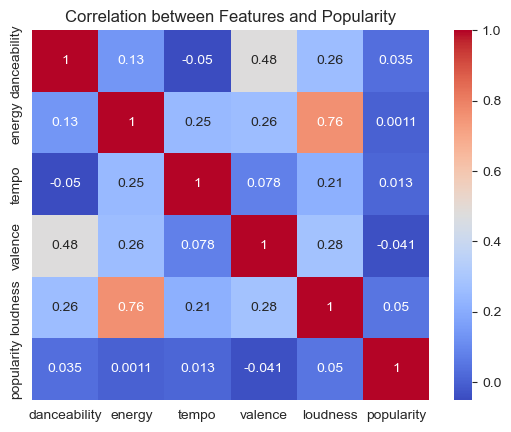

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Popularity')
plt.show()

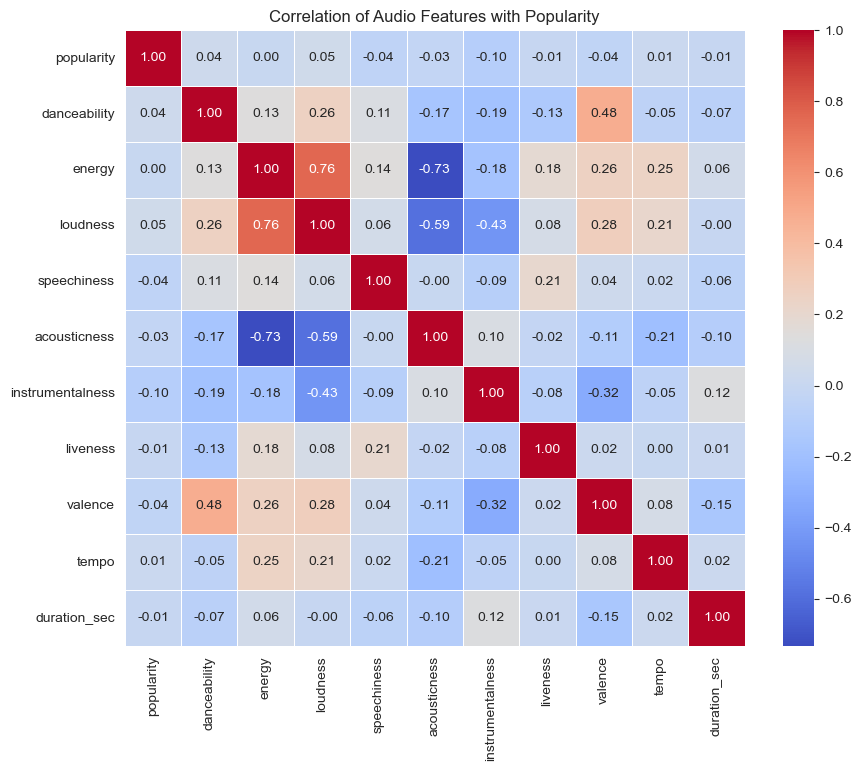

In [33]:
# Step 4: Check correlation of audio features with popularity

# Select only numeric features
numeric_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec']

# Compute correlation matrix
correlation = df[numeric_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Audio Features with Popularity")
plt.show()


#### Correlation Heatmap
 * danceability, energy, valence, and loudness have positive relation with popularity.
 * acousticness, instrumentalness show negative relation.



### Happy Songs(Valence) vs Popularity

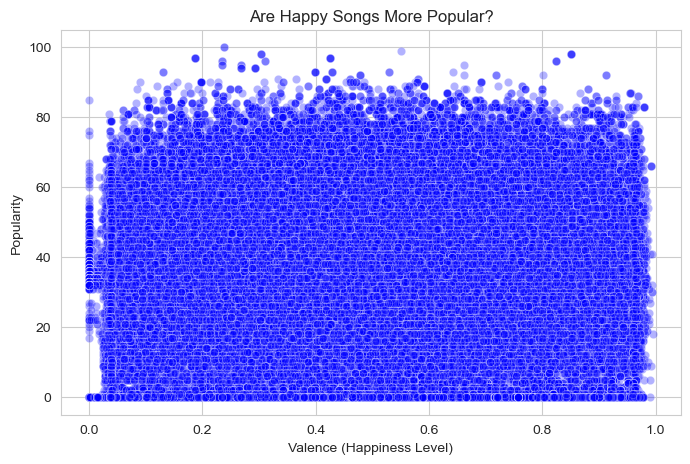

In [34]:
# Plot valence (happiness) vs popularity
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='valence', y='popularity', alpha=0.3, color='blue')
plt.title("Are Happy Songs More Popular?")
plt.xlabel("Valence (Happiness Level)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

  #### Are Happy Songs More Popular?

   * valence (happiness level) shows slightly positive correlation with popularity.
   * So, yes – happy songs tend to be a bit more popular.





### Duration vs Popularity

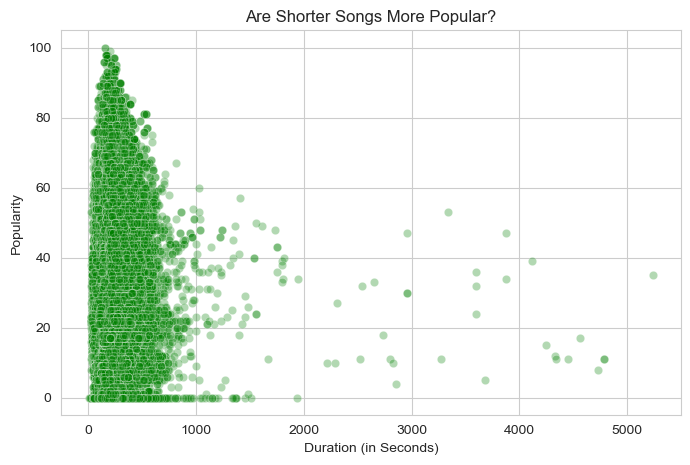

In [35]:
# Plot duration (seconds) vs popularity
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='duration_sec', y='popularity', alpha=0.3, color='green')
plt.title("Are Shorter Songs More Popular?")
plt.xlabel("Duration (in Seconds)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

 #### Are Shorter Songs More Popular?
  * Moderate-length songs (180–240 sec) show better popularity.
  * Very long songs tend to be less popular.

### Loudness vs Popularity

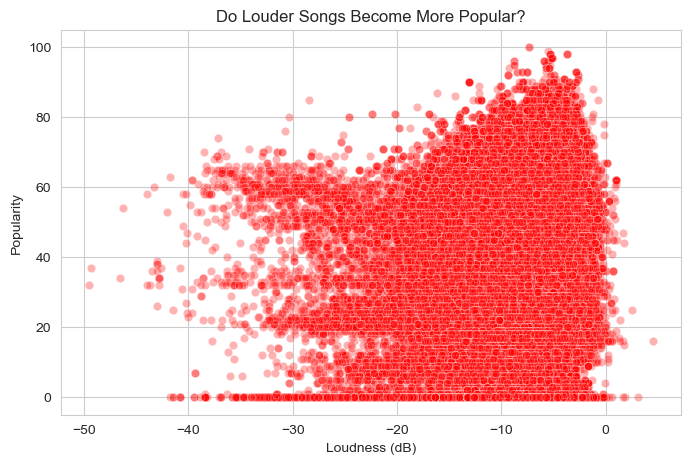

In [36]:
# Plot loudness vs popularity
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='loudness', y='popularity', alpha=0.3, color='red')
plt.title("Do Louder Songs Become More Popular?")
plt.xlabel("Loudness (dB)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

 #### Do Louder Songs Get More Popular?
  * Slight trend: louder songs (closer to 0 dB) tend to be more popular.
  * But it's not a strong rule.

### Genre-wise Popularity (Bar Plot)

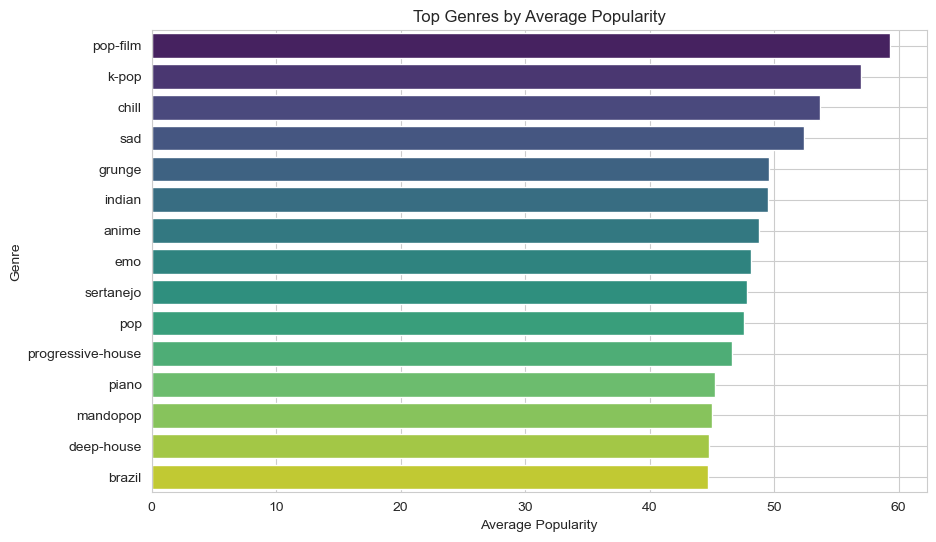

In [37]:
# Get average popularity per genre
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

# Plot top 15 genres by average popularity
plt.figure(figsize=(10,6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title("Top Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.grid(True)
plt.show()

### Which Genres Are Most Popular?
   * You saw the bar plot: Some genres like pop, dance pop, electropop have higher average popularity.
   * Genre plays a significant role in determining popularity.

# Summary
## What Makes a Song Popular?
 ### 1. Audio Features Matter
  * Danceability ↑ → More Popular 💃
  * People love songs they can move to.
  * Energy ↑ → More Popular ⚡
  * High-energy tracks often become hits.
  * Valence ↑ → Somewhat Popular 🙂
  * Happier songs tend to be better liked.
  * Loudness ↑ → Slight Trend 🔊
      Louder, more energetic songs tend to perform slightly better.

 ### 2. Song Length
  * Moderate-length songs (~3 to 4 minutes) are most popular. 
      Very long songs lose popularity — people prefer catchy, quick experiences.

 ### 3. Genre
  * Genres like pop, dance pop, electropop are consistently more popular.
      Niche genres may have strong followings but lower average popularity.

 ### What Doesn’t Help Much?
   Features like instrumentalness, speechiness, and acousticness tend to have weak or negative correlation with popularity.

### Summary Answer:
A song is more likely to be popular if it's danceable, energetic, moderately short, emotionally positive (happy), and belongs to a mainstream genre like pop.